# Statistics per BEL File

This notebook calculates statistics for each BEL file about the type of entities and relationships.

In [8]:
import os
import sys
import time

import pandas as pd
pd.set_option('display.max_rows', None)

from ebel_rest import connect, query, statistics

### Notebook Provenance
The explicit display of time of execution and the versions of the software packages used.

In [2]:
sys.version

'3.7.6 (default, Jan 30 2020, 09:44:41) \n[GCC 9.2.1 20190827 (Red Hat 9.2.1-1)]'

In [3]:
time.asctime()

'Wed Apr 22 09:09:04 2020'

# Set Graphstore Configuration and Connect

In [3]:
server = "http://graphstore.scai.fraunhofer.de"
password = 'covid'
user = 'covid_user'
db_name = "covid"
print_url = True

# Connect to database
connect(user, password, server, db_name, print_url)

# Generate Statistics


In [5]:
# Gather information
gen_stats = statistics.total_bel_nodes().data + statistics.total_bel_edges().data + statistics.total_publications().data
stat_names = ['Number of BEL Nodes', 'Number of BEL Relations', 'Number of Manually Curated Publications']
counts = []
for stat in gen_stats:
    counts += list(stat.values())

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_bel_nodes/
http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_stmts/
http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_publications/


In [6]:
df_stats = pd.DataFrame({'Statistic': stat_names, 'Counts': counts})
df_stats

,Statistic,Counts
0,Number of BEL Nodes,4210
1,Number of BEL Relations,4935
2,Number of Manually Curated Publications,153


## Number of Nodes by Type
### Raw Data View

In [7]:
statistics.nodes().data

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_nodes/


[{'number_of_nodes': 1096, 'node_class': 'complex'},
 {'number_of_nodes': 949, 'node_class': 'protein'},
 {'number_of_nodes': 684, 'node_class': 'biological_process'},
 {'number_of_nodes': 679, 'node_class': 'abundance'},
 {'number_of_nodes': 315, 'node_class': 'pathology'},
 {'number_of_nodes': 158, 'node_class': 'activity'},
 {'number_of_nodes': 107, 'node_class': 'gene'},
 {'number_of_nodes': 101, 'node_class': 'rna'},
 {'number_of_nodes': 65, 'node_class': 'composite'},
 {'number_of_nodes': 16, 'node_class': 'degradation'},
 {'number_of_nodes': 15, 'node_class': 'cell_surface_expression'},
 {'number_of_nodes': 11, 'node_class': 'translocation'},
 {'number_of_nodes': 8, 'node_class': 'cell_secretion'},
 {'number_of_nodes': 3, 'node_class': 'reaction'},
 {'number_of_nodes': 3, 'node_class': 'list'}]

### Table View

In [8]:
statistics.nodes().table[:10]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_nodes/


,number_of_nodes,node_class
0,1096,complex
1,949,protein
2,684,biological_process
3,679,abundance
4,315,pathology
5,158,activity
6,107,gene
7,101,rna
8,65,composite
9,16,degradation


### Convert Pandas DF to Bar Chart

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_nodes/


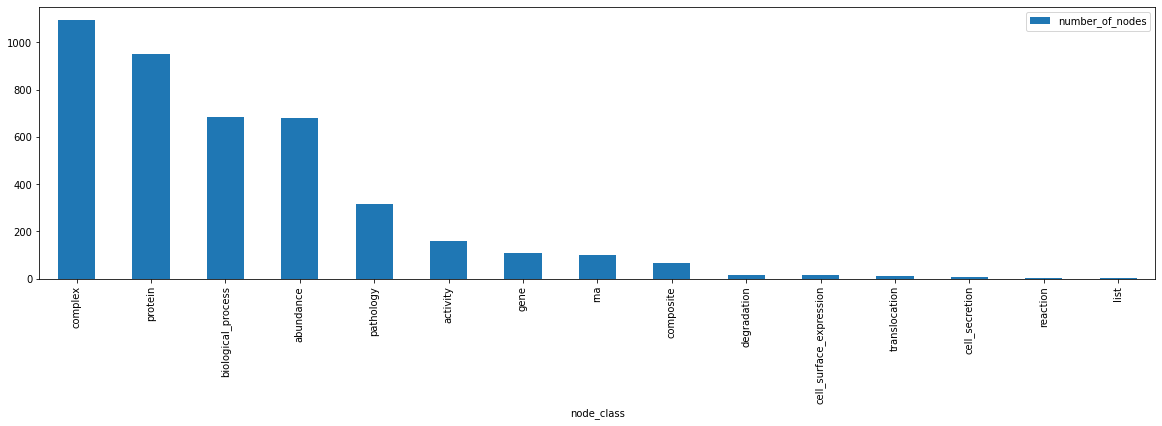

In [9]:
s = statistics.nodes()
s.table.set_index('node_class').plot.bar(figsize=(20,5))

## Number of Edges by Type

In [10]:
statistics.edges().table[:5]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_edges/


,number_of_edges,edge_class
0,1178,decreases
1,1153,increases
2,1144,positive_correlation
3,631,association
4,437,negative_correlation


## Number of Manually Curated Publications by Year

In [11]:
statistics.publication_by_year().table[:5]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_publication_by_year/


,publication_year,number_of_publications
0,2020,87
1,2019,4
2,2018,3
3,2016,2
4,2014,2


## Number of Extracted BEL Statements per Publication

In [12]:
statistics.publication_by_number_of_statements().table[:5]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_publication_by_number_of_statements/


,pmid,last_author,title,journal,publication_date,number_of_statements
0,32228226,Chen Y,Transcriptomic characteristics of bronchoalveolar lavage fluid and peripheral blood mononuclear cells in COVID-19 patients.,Emerging microbes & infections,2020-04-02,641
1,24987391,Liu DX,"Coronavirus infection, ER stress, apoptosis and innate immunity.",Frontiers in microbiology,2014-07-02,196
2,32147628,Gao J,Discovering drugs to treat coronavirus disease 2019 (COVID-19).,Drug discoveries & therapeutics,2020-03-16,126
3,32222466,Zhang S,The use of anti-inflammatory drugs in the treatment of people with severe coronavirus disease 2019 (COVID-19): The Perspectives of clinical immunologists from China.,"Clinical immunology (Orlando, Fla.)",2020-04-13,90
4,32217556,Ning Q,Clinical characteristics of 113 deceased patients with coronavirus disease 2019: retrospective study.,BMJ (Clinical research ed.),2020-04-06,81


## Number of Extracted BEL Statements by Last Author

In [14]:
statistics.last_author_by_number_of_statements().table[:5]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_last_author_by_number_of_statements/


,last_author,number_of_bel_statements
0,Chen Y,641
1,Liu DX,196
2,Ning Q,126
3,Gao J,126
4,Zhang S,90


## Number of Nodes per Namespace by Type

In [15]:
statistics.node_namespace_order_by_count().table[:5]

http://graphstore.scai.fraunhofer.de/function/covid/_bel_statistics_node_namespace_order_by_count/


,node_class,namespace,count
0,protein,HGNC,546
1,biological_process,GO,538
2,abundance,CHEBI,223
3,abundance,MESH,135
4,abundance,GO,112


## Frequency of Relation Type by PMID

In [9]:
statistics.edges_by_pmid(pivot=True)

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_edges_by_pmid/


edge_type,association,causes_no_change,decreases,has_component,has_members,increases,is_a,negative_correlation,positive_correlation,regulates
pmid,,,,,,,,,,
0,237,0,316,2,1,204,9,56,173,200
8803904,0,0,0,0,0,0,0,0,0,1
9764961,0,0,0,0,0,0,0,0,0,1
10848718,0,0,0,0,0,0,0,0,0,1
10896408,0,0,0,0,0,0,0,0,0,1
11752352,0,0,0,0,0,0,0,0,0,2
12756207,0,0,0,0,0,0,0,0,0,4
12920490,0,0,0,0,0,0,0,0,0,2
12967198,0,0,0,0,0,0,0,0,0,3


## Frequency of Node Type by PMID

In [10]:
statistics.nodes_by_pmid(pivot=True)

http://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_nodes_by_pmid/


Node Type,abundance,activity,biological_process,cell_secretion,cell_surface_expression,complex,composite,degradation,gene,list,pathology,protein,reaction,rna,translocation
pmid,,,,,,,,,,,,,,,
0,128,39,105,0,14,173,28,5,95,1,74,220,2,21,2
8803904,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9764961,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10848718,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10896408,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11752352,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
12756207,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0
12920490,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
12967198,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
